#  Semantic Segmentation using DeepLab

Implementation of using a pretrained Deeplab model to do child/background segmentation.

Inspired by:
<https://github.com/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb>

Sadly, this is a Tensorflow version1 (tf1) implementation, elsewhere we use tf2.

Models:
- xception_coco_voctrainaug and xception65_coco_voc_trainval both work well (have small differences, but no clear winner)
- mobilenet v2 models are much faster, but perform much worse

**Future work: **
Here is a more recent implementation
<https://github.com/tensorflow/models/blob/master/research/deeplab/model.py#L203>
which allow to get the output probabilities

In [1]:
import os
from pathlib import Path

from PIL import Image
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from deeplab import DeepLabModel, run_visualization, run_visualization_rgb

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
REPO_DIR = Path(os.getcwd()).parents[2]
DATA_DIR = REPO_DIR / 'data/background_segmentation/'; DATA_DIR

PosixPath('/Users/markus/Development/cgm/cgm-ml/data/background_segmentation')

Download the tar-ed model files from https://github.com/tensorflow/models/blob/master/research/deeplab/g3doc/model_zoo.md

In [6]:
# MODEL = DeepLabModel(DATA_DIR / 'deeplabv3_pascal_train_aug_2018_01_04.tar.gz')  # JZ choice: xception_coco_voctrainaug
# MODEL = DeepLabModel(DATA_DIR / 'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz')  # mobilenetv2_coco_voc_trainval  # works worse (face blur artifacts, space between legs is categorized as person)
MODEL = DeepLabModel(DATA_DIR / 'deeplabv3_pascal_trainval_2018_01_04.tar.gz')  # xception65_coco_voc_trainval

# Process low-res pickle files

In [7]:
sample_pickle_fpath = DATA_DIR / '1614660905-t4oy0mowjr_1614781407644_100_102.p'

In [8]:
# rgbd, targets = pickle.load(open(sample_pickle_fpath, "rb"))
# rgb = rgbd[0]
# im = Image.fromarray(rgb)
# b, g, r = im.split()
# im = Image.merge("RGB", (r, g, b))
# _ = plt.imshow(im)
# print(im.mode)
# print(im.size)
# plt.show()

In [9]:
# run_visualization(sample_pickle_fpath)

In [10]:
# for filename in os.listdir(DATA_DIR):
#     filepath = os.path.join(DATA_DIR, filename)
#     run_visualization(filepath)

# RGB high-res

In [15]:
DATA_DIR_RGB = DATA_DIR / 'tagging-tool-download'
sample_rgb_fpath = DATA_DIR_RGB / '021eb761-b677-4836-989a-31ef2d2b2955.png'

In [16]:
im = Image.open(sample_rgb_fpath)
resized_im, seg_map = MODEL.run(im)
print(im.size)
print(resized_im.size)
print(seg_map.shape)

(960, 1280)
(384, 513)
(513, 384)


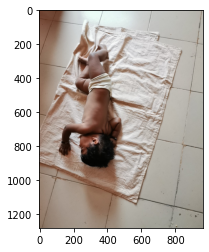

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/021eb761-b677-4836-989a-31ef2d2b2955.png
Ran deeplab: 3.12 sec


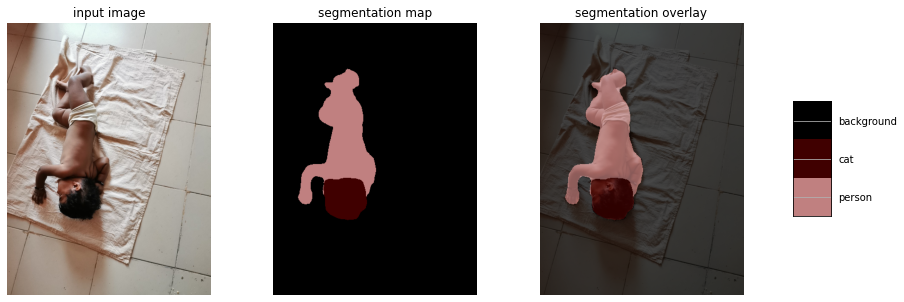

In [17]:
run_visualization_rgb(sample_rgb_fpath, MODEL)

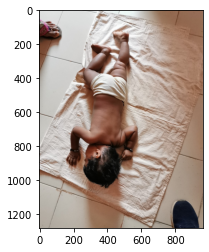

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/a22bffda-fc76-47d5-b005-02b57f90d569.png
Ran deeplab: 3.3 sec


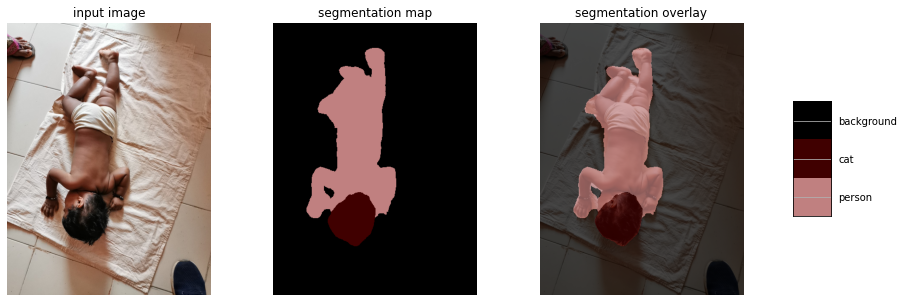

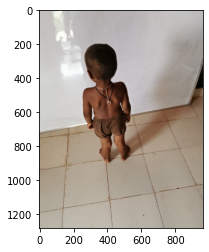

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/f9048241-815f-48e2-ad7d-71ac849f495c.png
Ran deeplab: 3.52 sec


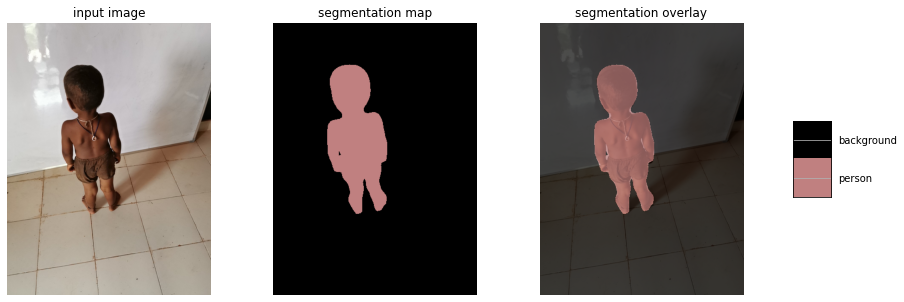

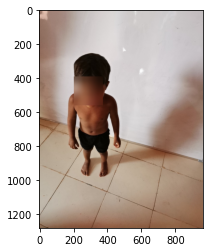

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/60fe1c29-36f6-4a06-9f33-5babe7ef0145.png
Ran deeplab: 3.13 sec


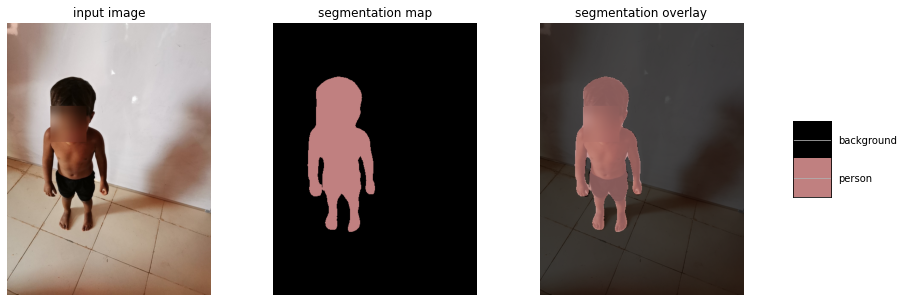

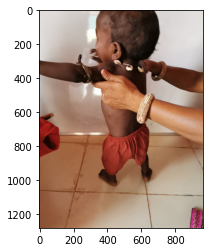

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/7d992337-0280-4fc8-baab-0b167e42468b.png
Ran deeplab: 3.46 sec


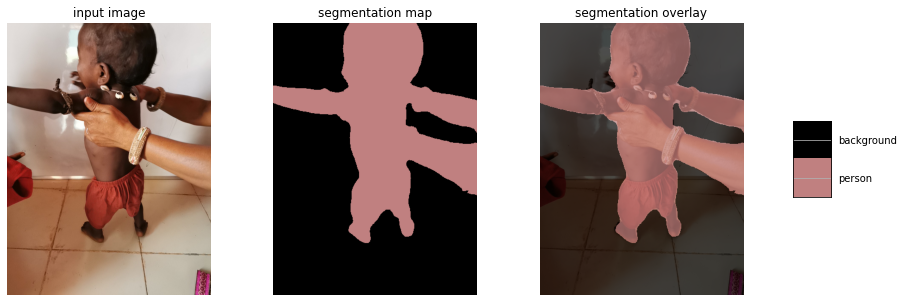

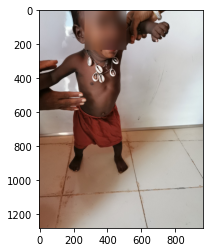

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/a82d3a88-bf0b-4fcf-835b-fc521a7b897c.png
Ran deeplab: 3.48 sec


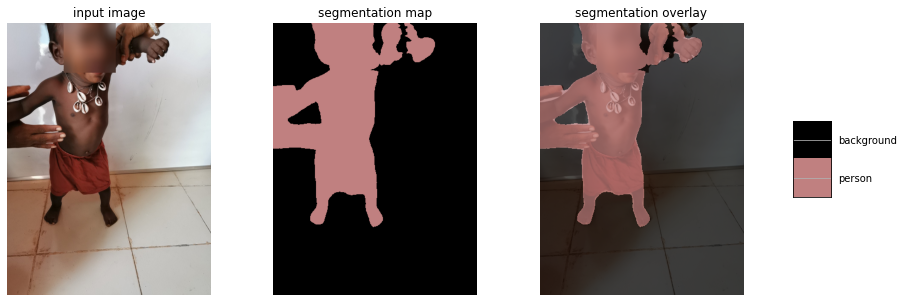

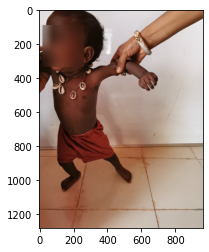

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/0adaf937-fbd0-4c03-962f-2f6d7ebcb5a8.png
Ran deeplab: 3.21 sec


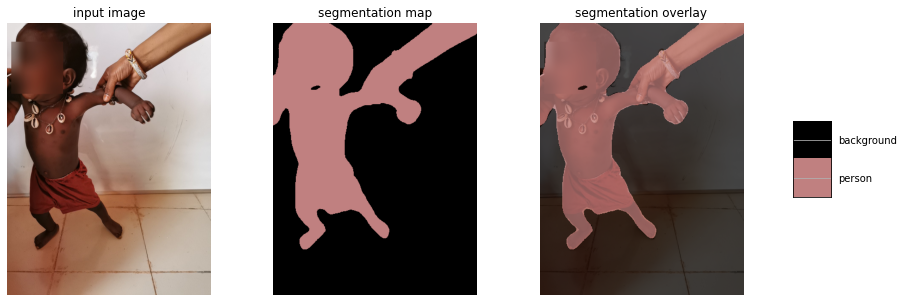

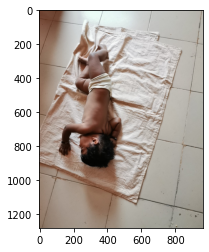

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/021eb761-b677-4836-989a-31ef2d2b2955.png
Ran deeplab: 4.06 sec


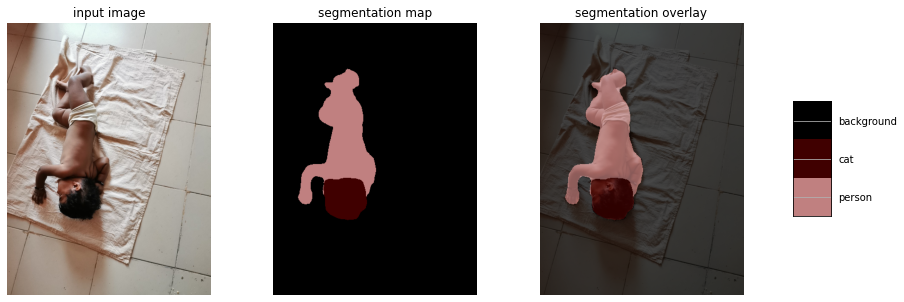

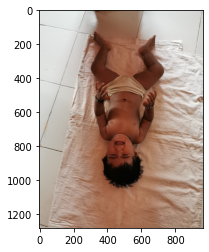

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/afc4456f-0a88-4323-b17b-de15a95e3814.png
Ran deeplab: 3.69 sec


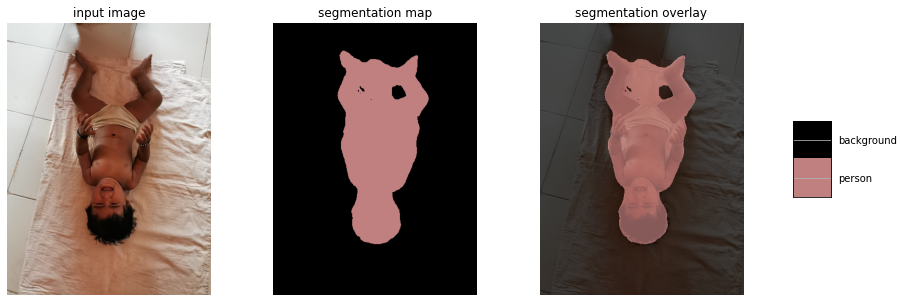

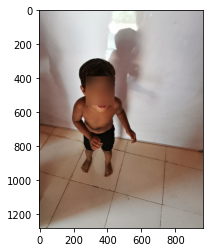

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/1ea34bb5-10b3-4fc0-9544-15145e76d1d4.png
Ran deeplab: 3.8 sec


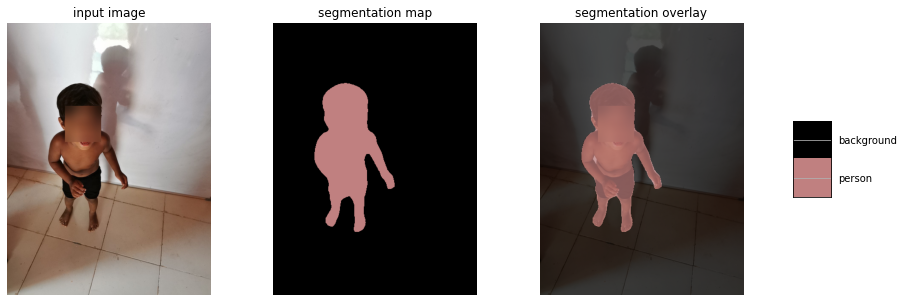

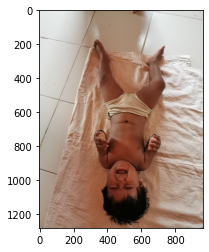

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/971a60bf-5fbf-4525-9eb7-9e51cb744e28.png
Ran deeplab: 3.94 sec


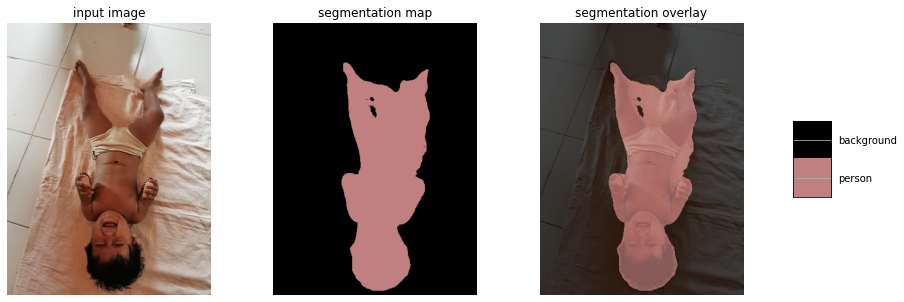

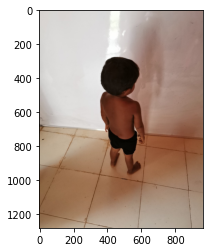

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/b3709fc3-2187-48c7-956d-a7403cb4cffe.png
Ran deeplab: 3.58 sec


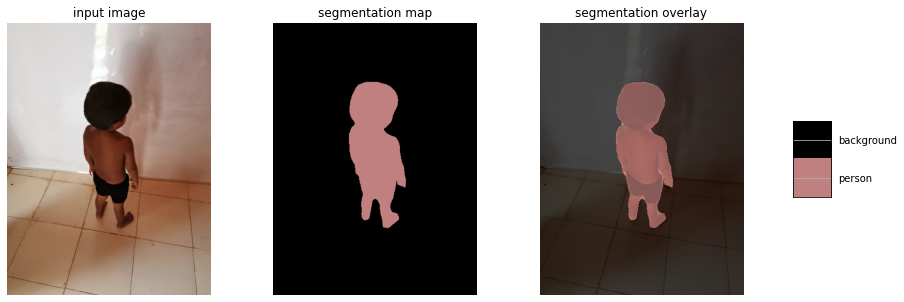

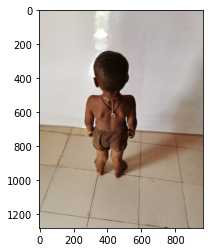

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/536bb47c-ed1d-4ada-be5d-d6383babac5a.png
Ran deeplab: 3.56 sec


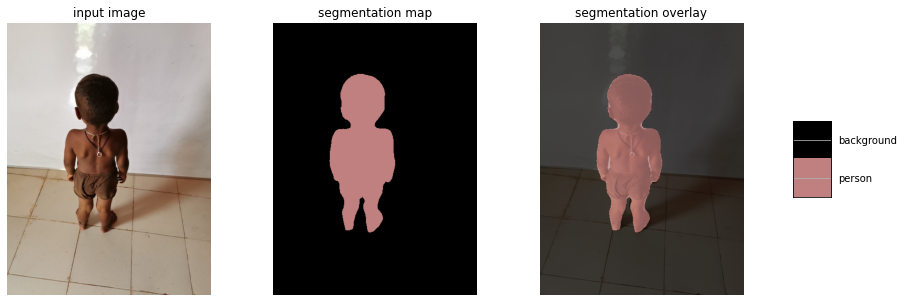

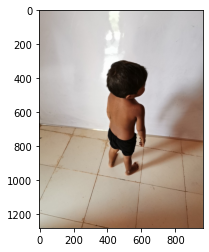

running deeplab on image /Users/markus/Development/cgm/cgm-ml/data/background_segmentation/tagging-tool-download/1ec93799-c2ae-4425-acb8-329b5b54d703.png
Ran deeplab: 3.66 sec


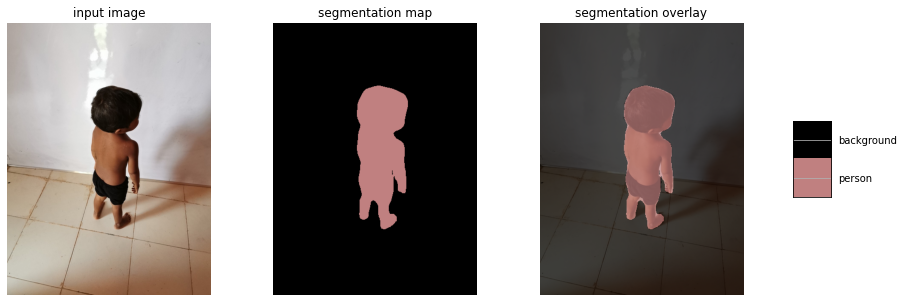

In [18]:
for fpath in DATA_DIR_RGB.glob("*.png"):
    run_visualization_rgb(fpath, MODEL)